In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


In [126]:
from catboost import Pool, CatBoostRegressor, cv
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [20]:
train = pd.read_csv( '../input/tabular-playground-series-jan-2021/train.csv', index_col='id')
test = pd.read_csv( '../input/tabular-playground-series-jan-2021/test.csv', index_col='id')



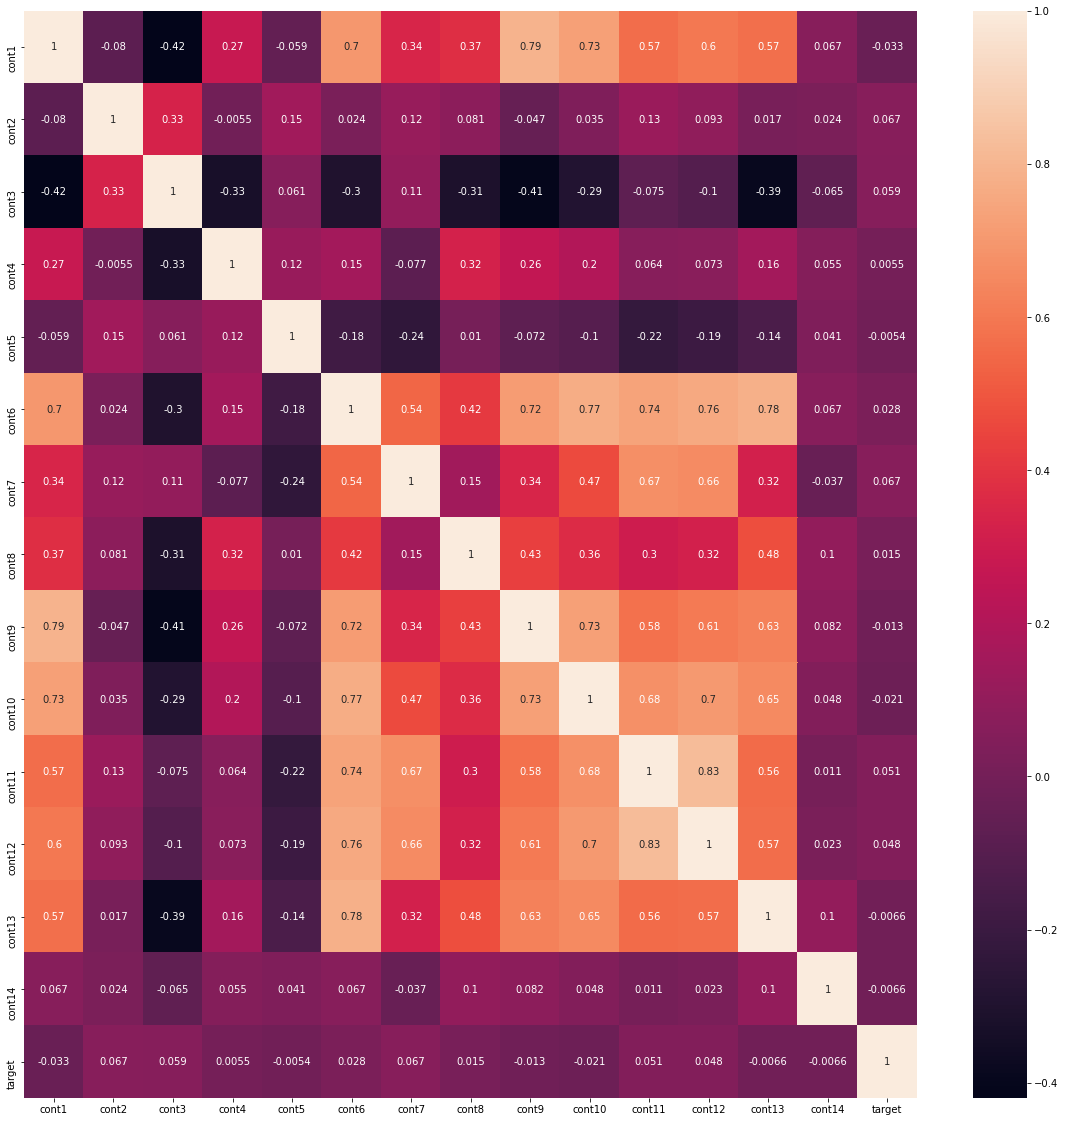

In [23]:
plt.rcParams["figure.figsize"]=20,20
sns.heatmap(train.corr(), annot = True)

In [24]:
y = train.pop('target')

In [36]:
train

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.216974,0.735265,0.648648,0.255387,0.616353,0.345197,0.295718,0.304357,0.314351,0.860504,0.315397,0.247682,0.486542,0.288750
499996,0.545799,0.165139,0.220966,0.190053,0.359362,0.386336,0.365767,0.344217,0.466446,0.454581,0.360251,0.360755,0.292535,0.619984
499997,0.284401,0.841542,0.957585,0.340383,0.396279,0.330376,0.525687,0.260039,0.378174,0.526925,0.491735,0.516629,0.173521,0.714552


In [128]:
model = CatBoostRegressor(iterations=700, 
                          depth=5, 
                         # task_type='GPU',
                          random_seed = 42,
                          loss_function='RMSE')


In [35]:

model.fit(train, y)
preds_train = model.predict(train)
mse(y, preds_train, squared = False)

0.47296491186521306

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
         train, y, test_size=0.2, random_state=0)

In [122]:
grid = {'learning_rate': [0.03, 0.1, 0.3],
        'depth': [4, 6, 10, 12],
        'iterations': [ 500, 900, 1200]}
grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.7112926091
bestIteration = 499

0:	loss: 0.7112926	best: 0.7112926 (0)	total: 9.39s	remaining: 5m 28s

bestTest = 0.7040684135
bestIteration = 498

1:	loss: 0.7040684	best: 0.7040684 (1)	total: 18s	remaining: 5m 5s

bestTest = 0.7023612404
bestIteration = 487

2:	loss: 0.7023612	best: 0.7023612 (2)	total: 26.5s	remaining: 4m 51s

bestTest = 0.7072222944
bestIteration = 899

3:	loss: 0.7072223	best: 0.7023612 (2)	total: 43.1s	remaining: 5m 45s

bestTest = 0.7018572758
bestIteration = 899

4:	loss: 0.7018573	best: 0.7018573 (4)	total: 59s	remaining: 6m 6s

bestTest = 0.7020606419
bestIteration = 660

5:	loss: 0.7020606	best: 0.7018573 (4)	total: 1m 15s	remaining: 6m 15s

bestTest = 0.7054980829
bestIteration = 1199

6:	loss: 0.7054981	best: 0.7018573 (4)	total: 1m 36s	remaining: 6m 38s

bestTest = 0.7011760516
bestIteration = 1163

7:	loss: 0.7011761	best: 0.7011761 (7)	total: 1m 57s	remaining: 6m 50s

bestTest = 0.7020606419
bestIteration = 660

8:	loss: 0.7020606	best: 0.

In [130]:
grid = {'learning_rate': [0.03, 0.1, 0.3],
        'depth': [4, 6, 10, 12],
        'iterations': [ 500, 900, 1200],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
        
grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True,
                                       cv = 5
                                      )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoostError: catboost/cuda/cuda_lib/cuda_manager.cpp:201: Condition violated: `State == nullptr'

In [46]:
model.fit(X_train, y_train)
preds_val = model.predict(X_test)

Learning rate set to 0.13577
0:	learn: 0.7309834	total: 26.5ms	remaining: 18.5s
1:	learn: 0.7293393	total: 51ms	remaining: 17.8s
2:	learn: 0.7279182	total: 86.5ms	remaining: 20.1s
3:	learn: 0.7267840	total: 114ms	remaining: 19.9s
4:	learn: 0.7257980	total: 141ms	remaining: 19.6s
5:	learn: 0.7249258	total: 166ms	remaining: 19.2s
6:	learn: 0.7240568	total: 189ms	remaining: 18.8s
7:	learn: 0.7234037	total: 213ms	remaining: 18.4s
8:	learn: 0.7228104	total: 236ms	remaining: 18.1s
9:	learn: 0.7222189	total: 260ms	remaining: 17.9s
10:	learn: 0.7216605	total: 284ms	remaining: 17.8s
11:	learn: 0.7210693	total: 311ms	remaining: 17.9s
12:	learn: 0.7204645	total: 339ms	remaining: 17.9s
13:	learn: 0.7200248	total: 364ms	remaining: 17.8s
14:	learn: 0.7196904	total: 387ms	remaining: 17.7s
15:	learn: 0.7191336	total: 412ms	remaining: 17.6s
16:	learn: 0.7187540	total: 436ms	remaining: 17.5s
17:	learn: 0.7184456	total: 462ms	remaining: 17.5s
18:	learn: 0.7179742	total: 487ms	remaining: 17.5s
19:	learn: 

163:	learn: 0.7029937	total: 4.39s	remaining: 14.4s
164:	learn: 0.7029311	total: 4.42s	remaining: 14.3s
165:	learn: 0.7028881	total: 4.44s	remaining: 14.3s
166:	learn: 0.7028298	total: 4.46s	remaining: 14.2s
167:	learn: 0.7027867	total: 4.48s	remaining: 14.2s
168:	learn: 0.7027290	total: 4.5s	remaining: 14.2s
169:	learn: 0.7026777	total: 4.53s	remaining: 14.1s
170:	learn: 0.7026259	total: 4.55s	remaining: 14.1s
171:	learn: 0.7025829	total: 4.58s	remaining: 14s
172:	learn: 0.7025267	total: 4.6s	remaining: 14s
173:	learn: 0.7024566	total: 4.63s	remaining: 14s
174:	learn: 0.7024151	total: 4.65s	remaining: 13.9s
175:	learn: 0.7023630	total: 4.67s	remaining: 13.9s
176:	learn: 0.7023265	total: 4.7s	remaining: 13.9s
177:	learn: 0.7022674	total: 4.73s	remaining: 13.9s
178:	learn: 0.7022195	total: 4.75s	remaining: 13.8s
179:	learn: 0.7021647	total: 4.77s	remaining: 13.8s
180:	learn: 0.7021230	total: 4.79s	remaining: 13.7s
181:	learn: 0.7020778	total: 4.82s	remaining: 13.7s
182:	learn: 0.7020216

323:	learn: 0.6962345	total: 8.24s	remaining: 9.56s
324:	learn: 0.6961985	total: 8.26s	remaining: 9.53s
325:	learn: 0.6961642	total: 8.29s	remaining: 9.51s
326:	learn: 0.6961288	total: 8.32s	remaining: 9.49s
327:	learn: 0.6960963	total: 8.34s	remaining: 9.46s
328:	learn: 0.6960655	total: 8.37s	remaining: 9.43s
329:	learn: 0.6960186	total: 8.39s	remaining: 9.41s
330:	learn: 0.6959968	total: 8.42s	remaining: 9.38s
331:	learn: 0.6959599	total: 8.44s	remaining: 9.36s
332:	learn: 0.6959274	total: 8.47s	remaining: 9.33s
333:	learn: 0.6958899	total: 8.49s	remaining: 9.3s
334:	learn: 0.6958398	total: 8.51s	remaining: 9.28s
335:	learn: 0.6957929	total: 8.54s	remaining: 9.25s
336:	learn: 0.6957672	total: 8.56s	remaining: 9.22s
337:	learn: 0.6957384	total: 8.58s	remaining: 9.19s
338:	learn: 0.6957128	total: 8.6s	remaining: 9.16s
339:	learn: 0.6956937	total: 8.62s	remaining: 9.13s
340:	learn: 0.6956666	total: 8.64s	remaining: 9.1s
341:	learn: 0.6956392	total: 8.67s	remaining: 9.07s
342:	learn: 0.6

486:	learn: 0.6912968	total: 12.2s	remaining: 5.36s
487:	learn: 0.6912685	total: 12.3s	remaining: 5.33s
488:	learn: 0.6912480	total: 12.3s	remaining: 5.31s
489:	learn: 0.6912186	total: 12.3s	remaining: 5.28s
490:	learn: 0.6911907	total: 12.3s	remaining: 5.25s
491:	learn: 0.6911676	total: 12.4s	remaining: 5.23s
492:	learn: 0.6911396	total: 12.4s	remaining: 5.2s
493:	learn: 0.6911076	total: 12.4s	remaining: 5.18s
494:	learn: 0.6910731	total: 12.4s	remaining: 5.15s
495:	learn: 0.6910481	total: 12.5s	remaining: 5.13s
496:	learn: 0.6910240	total: 12.5s	remaining: 5.1s
497:	learn: 0.6910080	total: 12.5s	remaining: 5.07s
498:	learn: 0.6909843	total: 12.5s	remaining: 5.05s
499:	learn: 0.6909548	total: 12.6s	remaining: 5.02s
500:	learn: 0.6909198	total: 12.6s	remaining: 4.99s
501:	learn: 0.6908924	total: 12.6s	remaining: 4.97s
502:	learn: 0.6908637	total: 12.6s	remaining: 4.94s
503:	learn: 0.6908387	total: 12.6s	remaining: 4.92s
504:	learn: 0.6908022	total: 12.7s	remaining: 4.89s
505:	learn: 0.

653:	learn: 0.6870969	total: 16.2s	remaining: 1.14s
654:	learn: 0.6870710	total: 16.3s	remaining: 1.12s
655:	learn: 0.6870513	total: 16.3s	remaining: 1.09s
656:	learn: 0.6870248	total: 16.3s	remaining: 1.07s
657:	learn: 0.6870018	total: 16.3s	remaining: 1.04s
658:	learn: 0.6869779	total: 16.4s	remaining: 1.02s
659:	learn: 0.6869615	total: 16.4s	remaining: 993ms
660:	learn: 0.6869362	total: 16.4s	remaining: 969ms
661:	learn: 0.6869111	total: 16.4s	remaining: 944ms
662:	learn: 0.6868933	total: 16.5s	remaining: 919ms
663:	learn: 0.6868742	total: 16.5s	remaining: 894ms
664:	learn: 0.6868547	total: 16.5s	remaining: 869ms
665:	learn: 0.6868373	total: 16.5s	remaining: 844ms
666:	learn: 0.6868158	total: 16.6s	remaining: 819ms
667:	learn: 0.6867921	total: 16.6s	remaining: 794ms
668:	learn: 0.6867610	total: 16.6s	remaining: 770ms
669:	learn: 0.6867403	total: 16.6s	remaining: 745ms
670:	learn: 0.6867132	total: 16.7s	remaining: 720ms
671:	learn: 0.6866817	total: 16.7s	remaining: 695ms
672:	learn: 

In [47]:
mse(y_test, preds_val, squared = False)

0.6991510365998579

In [116]:
model.fit(train, y)

Learning rate set to 0.141271
0:	learn: 0.7307562	total: 37.8ms	remaining: 26.4s
1:	learn: 0.7290349	total: 71.6ms	remaining: 25s
2:	learn: 0.7276174	total: 104ms	remaining: 24.1s
3:	learn: 0.7265128	total: 135ms	remaining: 23.4s
4:	learn: 0.7252362	total: 165ms	remaining: 22.9s
5:	learn: 0.7242696	total: 194ms	remaining: 22.4s
6:	learn: 0.7235465	total: 221ms	remaining: 21.8s
7:	learn: 0.7229141	total: 248ms	remaining: 21.5s
8:	learn: 0.7223587	total: 279ms	remaining: 21.4s
9:	learn: 0.7217958	total: 310ms	remaining: 21.4s
10:	learn: 0.7213433	total: 339ms	remaining: 21.3s
11:	learn: 0.7207819	total: 371ms	remaining: 21.3s
12:	learn: 0.7200471	total: 404ms	remaining: 21.4s
13:	learn: 0.7196224	total: 432ms	remaining: 21.2s
14:	learn: 0.7191985	total: 462ms	remaining: 21.1s
15:	learn: 0.7188032	total: 493ms	remaining: 21.1s
16:	learn: 0.7182338	total: 527ms	remaining: 21.2s
17:	learn: 0.7178993	total: 557ms	remaining: 21.1s
18:	learn: 0.7175508	total: 587ms	remaining: 21.1s
19:	learn: 

165:	learn: 0.7027280	total: 4.8s	remaining: 15.4s
166:	learn: 0.7026630	total: 4.83s	remaining: 15.4s
167:	learn: 0.7026037	total: 4.85s	remaining: 15.4s
168:	learn: 0.7025474	total: 4.88s	remaining: 15.3s
169:	learn: 0.7024947	total: 4.9s	remaining: 15.3s
170:	learn: 0.7024524	total: 4.93s	remaining: 15.2s
171:	learn: 0.7024025	total: 4.95s	remaining: 15.2s
172:	learn: 0.7023546	total: 4.98s	remaining: 15.2s
173:	learn: 0.7023080	total: 5.01s	remaining: 15.1s
174:	learn: 0.7022604	total: 5.04s	remaining: 15.1s
175:	learn: 0.7022144	total: 5.08s	remaining: 15.1s
176:	learn: 0.7021764	total: 5.1s	remaining: 15.1s
177:	learn: 0.7021265	total: 5.13s	remaining: 15s
178:	learn: 0.7020925	total: 5.15s	remaining: 15s
179:	learn: 0.7020452	total: 5.18s	remaining: 15s
180:	learn: 0.7019916	total: 5.21s	remaining: 14.9s
181:	learn: 0.7019534	total: 5.24s	remaining: 14.9s
182:	learn: 0.7019124	total: 5.27s	remaining: 14.9s
183:	learn: 0.7018696	total: 5.3s	remaining: 14.9s
184:	learn: 0.7018194	

329:	learn: 0.6966372	total: 9.37s	remaining: 10.5s
330:	learn: 0.6966067	total: 9.39s	remaining: 10.5s
331:	learn: 0.6965693	total: 9.42s	remaining: 10.4s
332:	learn: 0.6965423	total: 9.44s	remaining: 10.4s
333:	learn: 0.6965113	total: 9.47s	remaining: 10.4s
334:	learn: 0.6964724	total: 9.5s	remaining: 10.3s
335:	learn: 0.6964489	total: 9.53s	remaining: 10.3s
336:	learn: 0.6964284	total: 9.55s	remaining: 10.3s
337:	learn: 0.6964008	total: 9.58s	remaining: 10.3s
338:	learn: 0.6963562	total: 9.61s	remaining: 10.2s
339:	learn: 0.6963227	total: 9.64s	remaining: 10.2s
340:	learn: 0.6963039	total: 9.66s	remaining: 10.2s
341:	learn: 0.6962661	total: 9.7s	remaining: 10.2s
342:	learn: 0.6962448	total: 9.74s	remaining: 10.1s
343:	learn: 0.6962122	total: 9.79s	remaining: 10.1s
344:	learn: 0.6961844	total: 9.83s	remaining: 10.1s
345:	learn: 0.6961476	total: 9.87s	remaining: 10.1s
346:	learn: 0.6961104	total: 9.9s	remaining: 10.1s
347:	learn: 0.6960699	total: 9.93s	remaining: 10s
348:	learn: 0.696

490:	learn: 0.6922750	total: 14.1s	remaining: 5.98s
491:	learn: 0.6922438	total: 14.1s	remaining: 5.95s
492:	learn: 0.6922192	total: 14.1s	remaining: 5.92s
493:	learn: 0.6921988	total: 14.1s	remaining: 5.89s
494:	learn: 0.6921737	total: 14.2s	remaining: 5.87s
495:	learn: 0.6921567	total: 14.2s	remaining: 5.84s
496:	learn: 0.6921370	total: 14.2s	remaining: 5.81s
497:	learn: 0.6921177	total: 14.2s	remaining: 5.78s
498:	learn: 0.6920983	total: 14.3s	remaining: 5.75s
499:	learn: 0.6920848	total: 14.3s	remaining: 5.72s
500:	learn: 0.6920599	total: 14.3s	remaining: 5.7s
501:	learn: 0.6920384	total: 14.4s	remaining: 5.67s
502:	learn: 0.6920139	total: 14.4s	remaining: 5.64s
503:	learn: 0.6919938	total: 14.4s	remaining: 5.61s
504:	learn: 0.6919693	total: 14.4s	remaining: 5.58s
505:	learn: 0.6919447	total: 14.5s	remaining: 5.55s
506:	learn: 0.6919233	total: 14.5s	remaining: 5.52s
507:	learn: 0.6918888	total: 14.5s	remaining: 5.49s
508:	learn: 0.6918728	total: 14.6s	remaining: 5.46s
509:	learn: 0

649:	learn: 0.6887384	total: 18.9s	remaining: 1.46s
650:	learn: 0.6887162	total: 19s	remaining: 1.43s
651:	learn: 0.6886936	total: 19s	remaining: 1.4s
652:	learn: 0.6886767	total: 19s	remaining: 1.37s
653:	learn: 0.6886526	total: 19s	remaining: 1.34s
654:	learn: 0.6886355	total: 19.1s	remaining: 1.31s
655:	learn: 0.6886181	total: 19.1s	remaining: 1.28s
656:	learn: 0.6885905	total: 19.1s	remaining: 1.25s
657:	learn: 0.6885799	total: 19.2s	remaining: 1.22s
658:	learn: 0.6885626	total: 19.2s	remaining: 1.19s
659:	learn: 0.6885447	total: 19.2s	remaining: 1.17s
660:	learn: 0.6885299	total: 19.3s	remaining: 1.14s
661:	learn: 0.6885100	total: 19.3s	remaining: 1.11s
662:	learn: 0.6884888	total: 19.3s	remaining: 1.08s
663:	learn: 0.6884655	total: 19.4s	remaining: 1.05s
664:	learn: 0.6884498	total: 19.4s	remaining: 1.02s
665:	learn: 0.6884306	total: 19.4s	remaining: 991ms
666:	learn: 0.6884087	total: 19.4s	remaining: 962ms
667:	learn: 0.6883909	total: 19.5s	remaining: 933ms
668:	learn: 0.6883708

In [117]:
pred_test = pd.DataFrame( model.predict(test), index = test.index, columns = ['target'])

In [118]:
pred_test

,target
id,
0,7.949596
2,7.811952
6,7.891410
7,8.221617
10,8.241044
...,...
499984,8.168655
499985,8.193491
499987,8.197712


In [119]:
pred_test.to_csv('/kaggle/working/df.csv')